<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mind the path for the csv file in your gdrive
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/A160324189_28_143_208.csv" .
pd.options.display.float_format = "{:,.2f}".format

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dados = pd.read_csv("https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/module_1/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,041,248.80","8,199,032.67","8,363,386.07","7,889,819.50","8,603,943.85","8,048,398.25","8,159,737.49","8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,326,416.32","8,413,784.42","7,174,312.31","7,423,678.64","8,581,195.13","9,193,593.76","7,407,388.24",3556381.57,"929,129,659.72"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"3,355,223.35","3,562,691.54","3,375,296.64","3,341,497.58","3,358,378.05","3,145,385.44","2,638,773.92","2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,261,123.88","2,981,264.22","2,859,102.06","2,472,063.08","2,383,895.48","2,199,920.70","1,163,813.08",-,"420,668,039.63"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"13,718,828.46","14,396,210.86","13,745,304.22","13,979,792.94","13,895,515.90","13,518,116.80","13,635,186.02","14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,346,323.27","16,282,436.68","14,781,332.42","14,923,380.22","15,939,561.23","15,138,110.70","14,773,739.41","16,330,913.81","19,441,150.53","17,509,334.66","13,358,514.02",4726485.73,"1,771,654,871.23"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,699,213.85","2,682,746.28","2,891,100.20","2,737,677.78","2,693,726.29","2,671,451.53","2,688,315.70","2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,304,961.42","2,910,776.44","3,216,466.51","2,739,498.41",1524478.04,"305,010,883.18"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"31,808,597.47","32,133,134.42","33,770,556.65","32,979,925.38","33,665,042.35","33,475,545.29","32,067,934.67","33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,

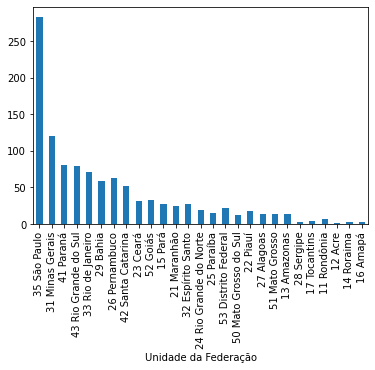

In [109]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.plot(kind='bar')
df_desafio_4 = gastos_do_mais_recente.copy()

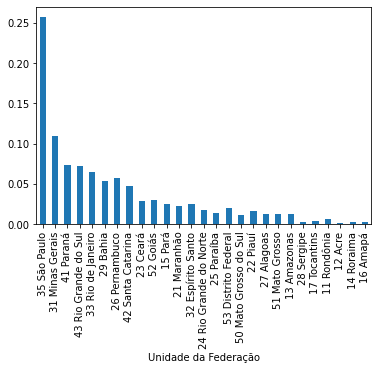

In [9]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

In [79]:
dados_da_pop = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""
# Fonte https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [63]:
from io import StringIO
dados_da_populacao_io = StringIO(dados_da_pop)
df_dados_da_populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
df_dados_da_populacao = df_dados_da_populacao[["Unidade federativa", "População"]]
df_dados_da_populacao.columns = ["uf", "populacao"]
df_dados_da_populacao = df_dados_da_populacao.set_index("uf")
df_dados_da_populacao = df_dados_da_populacao.dropna()
# df_dados_da_populacao['populacao'] = df_dados_da_populacao.apply(lambda x: int(x['populacao'].replace(" ","")), axis=1)
df_dados_da_populacao['populacao'] = df_dados_da_populacao['populacao'].str.replace(" ","").astype(int)

In [70]:
df_dados_da_populacao.index = df_dados_da_populacao.index.str.strip()
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [72]:
for estado in gastos_do_mais_recente.index:
  df_dados_da_populacao.index = df_dados_da_populacao.index.str.replace(f"{estado} {estado}", estado)

In [74]:
df_dados_da_populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


# Deafio

## Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [111]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_desafio_01 = pd.read_html(url)
df_desafio_01 = df_desafio_01[0]
df_desafio_01.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


## Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [110]:
def clean_n_join(df_dirty, df_ref):
  df_dirty = df_dirty[["Unidade federativa", "População"]]
  df_dirty.columns = ["uf", "populacao"]
  df_dirty = df_dirty.set_index("uf")
  df_dirty = df_dirty.dropna()
  df_dirty['populacao'] = df_dirty['populacao'].str.replace(" ","").astype(int)
  df_dirty.index = df_dirty.index.str.strip()
  df_ref.index = df_ref.index.str[3:]
  for estado in df_ref.index:
    df_dirty.index = df_dirty.index.str.replace(f"{estado} {estado}", estado)
  return df_dirty.join(df_ref)

clean_n_join(df_desafio_01, df_desafio_4)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21292666,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62
